# Exploratory Data Analysis on #66DaysofData
## Frank Coleman III
### Dataset retrieved from: Notion

## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv("notion_data.csv")
df.head(5)


,Type,Name,Language/Software,Packages,Tags,Author,Created,Status,Score/5,URL,Source,Minutes,Finish Date,Start Date,Hours,Notes?,Linked Up?,Related to Coding Course Notes (Property)
0,Course,Cleaning Data in Python,Python,NaN,NaN,NaN,"February 23, 2022 11:22 PM",Not Started,NaN,NaN,DataCamp,240.00,NaN,"February 24, 2022",4.000000,No,No,NaN
1,Course,Intermediate Importing Data in Python,Python,"BeautifulSoup, Tweepy, json, request","#66DaysofData, APIs, Importing Data, Python, R...",NaN,"February 23, 2022 12:18 AM",Finished,⭐️⭐️⭐️,NaN,DataCamp,180.00,"February 23, 2022","February 23, 2022",3.000000,No,No,NaN
2,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,"#66DaysofData, Career, Round1, Tableau",Alex the Analyst,"February 23, 2022 12:06 AM",Finished,NaN,https://www.youtube.com/watch?v=4A8LV6fObYA&t=...,YouTube,12.80,"February 22, 2022","February 22, 2022",0.213333,No,No,NaN
3,Video,How to learn Tableau in 2022: Full platform gu...,Tableau,NaN,"#66DaysofData, Round1, Tableau",Tableau Tim,"February 22, 2022 5:47 PM",Finished,⭐️⭐️⭐️⭐️,https://www.youtube.com/watch?v=ayc6AjOuQb0&t=...,YouTube,31.65,"February 22, 2022","February 17, 2022",0.527500,No,No,NaN
4,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Python,pandas,"#66DaysofData, Data Analysis, Exploratory Data...",Towards Data Science,"February 11, 2022 11:45 PM",Finished,NaN,https://towardsdatascience.com/8-ways-to-filte...,Medium,20.00,"February 12, 2022","February 12, 2022",0.333333,No,No,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Type                                       106 non-null    object 
 1   Name                                       150 non-null    object 
 2   Language/Software                          29 non-null     object 
 3   Packages                                   13 non-null     object 
 4   Tags                                       106 non-null    object 
 5   Author                                     49 non-null     object 
 6   Created                                    151 non-null    object 
 7   Status                                     87 non-null     object 
 8   Score/5                                    27 non-null     object 
 9   URL                                        143 non-null    object 
 10  Source                    

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)


3

In [6]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Related to Coding Course Notes (Property)    1.000000
Packages                                     0.913907
Score/5                                      0.821192
Language/Software                            0.807947
Author                                       0.675497
Source                                       0.649007
Finish Date                                  0.609272
Start Date                                   0.556291
Minutes                                      0.549669
Status                                       0.423841
Type                                         0.298013
Tags                                         0.298013
URL                                          0.052980
Name                                         0.006623
Created                                      0.000000
Hours                                        0.000000
Notes?                                       0.000000
Linked Up?                                   0.000000
dtype: float64

<AxesSubplot:>

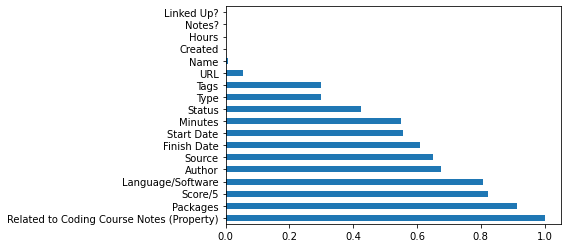

In [7]:
missing_percentages.plot(kind='barh')


### Changing Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Type                                       106 non-null    object 
 1   Name                                       150 non-null    object 
 2   Language/Software                          29 non-null     object 
 3   Packages                                   13 non-null     object 
 4   Tags                                       106 non-null    object 
 5   Author                                     49 non-null     object 
 6   Created                                    151 non-null    object 
 7   Status                                     87 non-null     object 
 8   Score/5                                    27 non-null     object 
 9   URL                                        143 non-null    object 
 10  Source                    

In [9]:
#Minutes, Hours should be float
pd.to_numeric(df["Minutes"], errors='coerce').fillna(0)
pd.to_numeric(df["Hours"], errors='coerce').fillna(0)

0      4.000000
1      3.000000
2      0.213333
3      0.527500
4      0.333333
         ...   
146    0.466667
147    0.258500
148    0.125000
149    0.000000
150    0.933333
Name: Hours, Length: 151, dtype: float64

In [12]:
#Created, Finish Date, Start Date should be datetime
df['Created'] = pd.to_datetime(df["Created"], errors='raise', format="%B %d, %Y %I:%M %p")
df['Finish Date'] = pd.to_datetime(df["Finish Date"], errors='raise', format="%B %d, %Y")
df['Start Date'] = pd.to_datetime(df["Start Date"], errors='raise', format="%B %d, %Y")


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Type                                       106 non-null    object        
 1   Name                                       150 non-null    object        
 2   Language/Software                          29 non-null     object        
 3   Packages                                   13 non-null     object        
 4   Tags                                       106 non-null    object        
 5   Author                                     49 non-null     object        
 6   Created                                    151 non-null    datetime64[ns]
 7   Status                                     87 non-null     object        
 8   Score/5                                    27 non-null     object        
 9   URL                  

In [14]:
df['Finish Date'].dt.month_name()

0            NaN
1       February
2       February
3       February
4       February
         ...    
146    September
147    September
148    September
149          NaN
150          NaN
Name: Finish Date, Length: 151, dtype: object

In [15]:
df.tail()

,Type,Name,Language/Software,Packages,Tags,Author,Created,Status,Score/5,URL,Source,Minutes,Finish Date,Start Date,Hours,Notes?,Linked Up?,Related to Coding Course Notes (Property)
146,Video,Data Science Project from Scratch - Part 2 (Da...,NaN,NaN,"DS Projects, Data Science",Ken Jee,2021-12-21 17:58:00,Finished,⭐️⭐️⭐️⭐️⭐️,https://www.youtube.com/watch?v=GmW4F6MHqqs,NaN,28.00,2020-09-23,2020-09-23,0.466667,No,No,NaN
147,Video,(50) The Second Brain - A Life-Changing Produc...,NaN,NaN,Productivity,NaN,2021-12-21 17:58:00,Finished,NaN,https://www.youtube.com/watch?v=OP3dA2GcAh8,NaN,15.51,2020-09-25,2020-09-25,0.258500,No,No,NaN
148,Video,Data Science Project from Scratch - Part 1 (Pr...,NaN,NaN,"DS Projects, Data Science",Ken Jee,2021-12-21 17:58:00,Finished,⭐️⭐️⭐️⭐️⭐️,https://www.youtube.com/watch?v=MpF9HENQjDo,NaN,7.50,2020-09-23,2020-09-23,0.125000,No,No,NaN
149,Book,Data Newbie to Guru: The Visual Guide to Learn...,NaN,NaN,"Data Science, SQL",Dr. Chantel Perry,2021-12-21 17:58:00,Started,NaN,NaN,NaN,NaN,NaT,2020-07-31,0.000000,No,No,NaN
150,Podcast,Build Your Brand in Data Science,NaN,NaN,Data Science,NaN,2021-12-21 17:58:00,NaN,NaN,https://podcasts.apple.com/us/podcast/50-ken-j...,NaN,56.00,NaT,2020-09-23,0.933333,No,No,NaN


I'll only be analyzing observations that I completed (Status = Finished) and that were done during the #66DaysofData challenge. Those are tagged #66DaysofData

### Dropping Unnecessary Columns

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Type                                       106 non-null    object        
 1   Name                                       150 non-null    object        
 2   Language/Software                          29 non-null     object        
 3   Packages                                   13 non-null     object        
 4   Tags                                       106 non-null    object        
 5   Author                                     49 non-null     object        
 6   Created                                    151 non-null    datetime64[ns]
 7   Status                                     87 non-null     object        
 8   Score/5                                    27 non-null     object        
 9   URL                  

In [19]:
df = df.drop(["Related to Coding Course Notes (Property)", "Linked Up?", "Notes?", "Score/5", "URL"], axis=1)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Type               106 non-null    object        
 1   Name               150 non-null    object        
 2   Language/Software  29 non-null     object        
 3   Packages           13 non-null     object        
 4   Tags               106 non-null    object        
 5   Author             49 non-null     object        
 6   Created            151 non-null    datetime64[ns]
 7   Status             87 non-null     object        
 8   Source             53 non-null     object        
 9   Minutes            68 non-null     float64       
 10  Finish Date        59 non-null     datetime64[ns]
 11  Start Date         67 non-null     datetime64[ns]
 12  Hours              151 non-null    float64       
dtypes: datetime64[ns](3), float64(2), object(8)
memory usage: 15.5+ K

# Renaming Columns

In [22]:
df.rename(columns = {'Finish Date': 'Finish_Date', 'Start Date': 'Start_Date'}, inplace = True)


In [23]:
df.columns

Index(['Type', 'Name', 'Language/Software', 'Packages', 'Tags', 'Author',
       'Created', 'Status', 'Source', 'Minutes', 'Finish_Date', 'Start_Date',
       'Hours'],
      dtype='object')

In [24]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)


2

In [25]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Packages             0.913907
Language/Software    0.807947
Author               0.675497
Source               0.649007
Finish_Date          0.609272
Start_Date           0.556291
Minutes              0.549669
Status               0.423841
Type                 0.298013
Tags                 0.298013
Name                 0.006623
Created              0.000000
Hours                0.000000
dtype: float64

<AxesSubplot:>

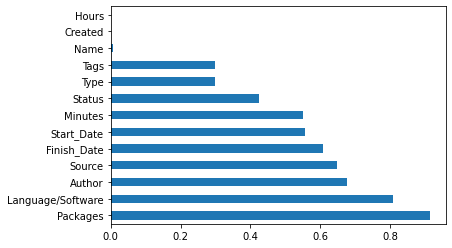

In [26]:
missing_percentages.plot(kind='barh')


In [8]:
df.describe()

,Minutes,Hours,Related to Coding Course Notes (Property)
count,68.000000,151.000000,0.0
mean,60.645147,0.455173,NaN
std,110.872873,1.334087,NaN
min,1.000000,0.000000,NaN
25%,9.832500,0.000000,NaN
50%,18.750000,0.000000,NaN
75%,56.250000,0.262583,NaN
max,739.900000,12.331667,NaN


## Exploratory Analysis and Visualization

Columns we'll analyze:

1. Type
2. Start Date and Finish Date
3. Language/Software
4. Tags
5. Source
6. Author
7. Minutes

In [9]:
df.columns

Index(['Type', 'Name', 'Language/Software', 'Packages', 'Tags', 'Author',
       'Created', 'Status', 'Score/5', 'URL', 'Source', 'Minutes',
       'Finish Date', 'Start Date', 'Hours', 'Notes?', 'Linked Up?',
       'Related to Coding Course Notes (Property)', 'Property'],
      dtype='object')

In [10]:
df.pivot_table(values='Hours', index='Type', columns='Status')

Status,Finished,Not Started,Started
Type,,,
Article,0.102381,0.0,0.000000
Book,NaN,NaN,0.000000
Course,0.928033,NaN,3.266333
Podcast,0.908333,0.0,NaN
Tweet,0.016667,NaN,NaN
Video,0.470493,NaN,1.168333


## Ask and Answer Question

1. What type of resources did I consume the most? Quantity and time-wise.
2. What days of the week did I finish most resources?
3. Who's my favorite author?
4. What was tagged the most?
5. What was my total time spent on #66DaysofData?
6. What source did I use the most?

## Summary and Conclusion


Limitations:
- I only gave myself credit for the resources I finished.
- There is inevitably missing data. Some videos I watched, articles I read didn't get input into the system.
- 
- 